# Pattern Recognition and Machine Learning
## 1.1 Example: Polynomial Curve Fitting

Based on the original notebook in: https://github.com/tkazusa/Python_MachineLeaning/blob/master/1.1%20Polynomial%20Curve%20Fitting.ipynb.

### Objective
The aim of this notebook is to follow the discussion in section 1.1 from the book **Pattern Recognition and Machine Learning** by *Christopher Bishop*. First I give an ultra-fast introduction to `python`, `numpy` and `matplotlib`, from there we proceed to follow the section 1.1 of Bishop's book in the interactive notebook style. I took the main idea from the notebook cited above and modified it according to my own style.

## Ultra-fast introduction to Python and Jupyter notebooks
Python is one of the most popular programming languages in the world. It is an interpreted, high-level and general-purpose programming language [(Python's Wikipedia page)](https://en.wikipedia.org/wiki/Python_(programming_language)). The design of Python aims to provide a programming language which prioritize code readability. When writing Python code always try to follow the "guiding principles", also called *The Zen of Python*. You can read these by running the cell above which contains the piece of code `import this`.

On the other hand, Project Jupyter is a non-profit organization which aims to provide open-source software for data analytics and scientific computing [Project Jupyter's Wikipedia webpage](https://en.wikipedia.org/wiki/Project_Jupyter). More specifically, you are running or watching right now a Jupyter notebook, which is a "web-based interactive computational environment" as Project Jupyter's Wikipedia page states.

We shall be using Jupyter notebooks as they provide an interactive environment and because Python is a very-easy to learn programming language. In the next sections I will keep it simple and provide examples for very basic Python operations. We assume in here you have a basic knowledge of what a `for` loop and a conditional statement are.

In [ ]:
import this ## The Zen of Python.

In [1]:
## Magic command.
%matplotlib inline

## Here is how to call libraries.
import numpy as np ## The n-dimensional array numeric library.
from matplotlib import pyplot as plt ## Plotting library.
import sys ## Library to interact with the system. Not important by now.

## Print the versions of Python and used libraries.
print('Python version: {}'.format(sys.version))
print('Numpy version: {}'.format(np.__version__))

## 

Python version: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Numpy version: 1.16.4


### Lists, functions, NumPy arrays, NumPy functions
In this part I skip examples of how to write `if` statements and `for` loops in Python. Examples of those can be easily found by googling "if statement python" or similar.

In `python`, lists are one of the basic data structures. They can contain any type of data.

In [2]:
## Define a list.
a = [1.2, 2, 'abc']

## Create an empty list.
b = []

## Extract value from a list.
print(a[1])

2


In `numpy` there is the `ndarray`. The name comes from n-dimensional array. For our purposes we only need to deal with matrices and vectors. `ndarray`s can be constructed from lists but all objects inside the list must be of the same type or at least convertible to the same type.

The fundamental advantage of the `ndarray` is that quick vector and matrices operations are implemented within `numpy`. Every operation is executed element-wise or following some rules described in the documentation. Documentation can be found in:
- [NumPy v1.16.0 reference](https://docs.scipy.org/doc/numpy-1.16.0/reference/index.html).

Below there are some examples in the use of the `ndarray`.

In [3]:
a = np.array([1., 2., 3., 4., 5.])
b = np.array([i for i in np.arange(0., 10., 2.)])

## Check the values of the arrays.
print('Checking arrays')
print(a, b, '\n')

## Some operations. Note they are element-wise.
print('Operations on arrays')
print(a + b)
print(a * b)
print(b / a)
print()

## Some numpy functions on arrays.
print('Numpy functions on arrays')
print('Sum of all elements of a: {}'.format(np.sum(a)))
print('Average of all elements in a: {}'.format(np.mean(a)))

Checking arrays
[1. 2. 3. 4. 5.] [0. 2. 4. 6. 8.] 

Operations on arrays
[ 1.  4.  7. 10. 13.]
[ 0.  4. 12. 24. 40.]
[0.         1.         1.33333333 1.5        1.6       ]

Numpy functions on arrays
Sum of all elements of a: 15.0
Average of all elements in a: 3.0


We can create functions which generalize some actions. For example, I create a function below that take the first element of a list. In Python, you don't tell the function the type of object it is going to receive as an argument. You just write the instructions inside the function as if the object received is of the required type. If the received object does not have the properties to execute the code within the function, Python itself will throw an error. You can program how to deal with errors but that's another topic.

In [4]:
## Defining a function to extract the first element of a list.
def first(a):
    ## A is the argument, we will treat it as a list.
    first_element = a[0]
    return first_element

## Test the created function.
some_list = [1, 2, 3]

## Let's see if the 
print(first(some_list))

1


The module `pyplot` contains utilities to make quick and easy plots using `ndarray`s. We not plot the elements of `a` against the elements of `b`.

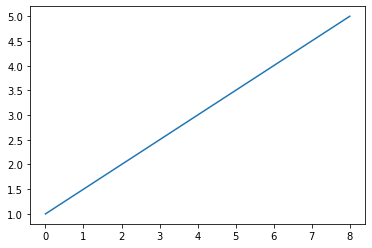

In [5]:
plt.figure() ## Creates figure instance.
plt.plot(b, a) ## Gives the order to plot inside the figure.
plt.show() ## Show the figure.

## Polynomial curve fitting
Here, we begin to follow section 1.1 of Bishop's book. The problem is the next: we want to use the value of some real-valued input variable $x$ to predict the value of real-valued target variable $t$. We suppose also we have some way to measure both $x$ and $t$. In general, we are going to have $N$ observations of both $x$ and $t$ that we express as having vectors $\mathbf{x} = (x_1,\ldots,x_N)^T$ and $\mathbf{t} = (t_1,\ldots,t_N)^T$.

The general idea is that the data have some regularity we want to find out, but this regularity is disrupted by some noise which can come from the imperfection of our measurements, among other sources. In order to describe the regularity of the data we must propose a model relating the input variables $x$ with the target variables $t$. Once we have proposed some model, we must adjust the parameters of our model in order to fit the data properly. To adjust the parameters, we, of course, use the observations we already have. The observations we are going to use to adjust the parameters of the model are called **the training set**. Once we have found some parameters, we use new values of the input variable $\hat{x}$ to predict a new value for the target variable $t$. These new information is called the **test set**, which is the information we will use to test our model. The success of our model will be defined by how accurately it can predict observations of the target variable given some new(s) value(s) of the input variable(s).

In our example we are going to solve the problem of approximating a mapping function $f$ which maps input variables $x$ to *continous* variables $t$. When the target variable is continous it is called a **regression problem**, as opposed to when the target variable is discrete. In the latter case, the problem is called a **classification problem**. A nice and short discussion about the difference between these two different type of problems can be found [here](https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/). We can characterize our problem further depending on the method we will use to solve it.

The next sections come as follow:
- We generate our training data, our test data and explain how we generated them.
- We define the models to be fitted and some measurement of the accuracy of our fitted models. This will allow us to define a criteria to find the optimal parameters to fit the data. In here we will compute the optimal parameters given the model.
- Finally, we make some analysis on how well our model predicts new data.

###  Generating the training and test data

For didactical purposes we are going to work with synthetically originated data along the lines of *Appendix A* of *Bishop's* book. Since data it's originated synthetically, we know where the data regularity comes from. We are going to use a sine function with some random noise the disrupts the regularity of the sine function. Our random noise is going to follow a normal distribution with mean $\mu=0$ and standard deviation $\sigma = 0.3$. As it says in the caption of *Figure 1.2* of *Section 1.1*, the objective is "to predict the value of $t$ for some new value of $x$, without knowledge of the green curve".

Training data is generated as follows, we take $N=10$ points uniformly spaced in the interval $[0,1]$, these are going to be our input variable values $\mathbf{x} = (x_1,\ldots,x_N)^T$. We then compute $f(x_n) = \sin(2\pi x_n)$ for each $n=1,\ldots,N$ and add randomly generated values following the normal distribution we described above. Our training target data is going to be $t_n = f(x_n) + \text{random noise}$.

As of caption of *Figure 1.2* we now "plot a traning data set of $N = 10$ points, shown as blue circles, each comprising an observation of the input variable $x$  along with the corresponding target variable $t$. The green curve shows the function $\sin(2\pi x)$ used to generate the data".


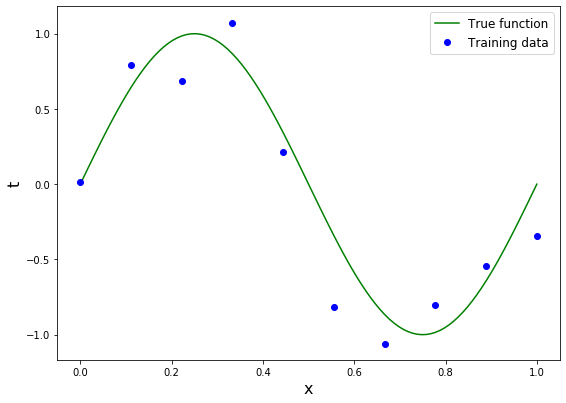

In [7]:
## Set the random seed. This ensures reproducibility.
## Any time you run this cell you will generate exactly the same dataset.
np.random.seed(4)

N_train = 10 ## Number of points in the training dataset.
N_test = 100 ## Number of points in the test dataset.

## Parameters of the random noise.
mu = 0. ## Mean of the Gaussian distribution.
sigma = 0.3 ## Standard deviation of the Gaussian distribution.

## 10 uniformly spaced numbers in [0, 1]. Training input dataset.
## First argument is the lower bound and second argument is the upper bound.
x_train = np.linspace(0., 1., num = N_train)

## Target dataset. Function sin(2\pi x) plus random noise.
t_train = np.sin(2.*np.pi*x_train) + np.random.normal(0., 0.3, N_train)

## To plot the true function.
x_test = np.linspace(0., 1., num = N_test) ## These values of x will also be used as part of the test dataset.
t_true = np.sin(2.*np.pi*x_test) ## Values for the true function.

## To complete the test dataset. We are going to save this for later.
t_test = np.sin(2.*np.pi*x_test) + np.random.normal(mu, sigma, N_test)

## We plot the training data and function from which the data was generated.
plt.figure(figsize=(9,6.5))
plt.plot(x_test, t_true, 'g', label='True function')
plt.plot(x_train, t_train, 'bo', label='Training data')
plt.xlabel(r"x", fontsize=16)
plt.ylabel(r"t", fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.show()

### The models and the error function

As we've said before we must propose a model to fit the data. We are actually going to propose a set of models which are polynomials of the form
\begin{equation}
 y(x, {\bf w}) = w_0 + w_1 x + w_1 x^2 + ...+ w_M x^M = \sum_{j=0}^M w_j x^M \tag{1.1}\label{eq:1.1}
\end{equation}
where $M$ is the degree of the polynomial.
We must note in here a very important characteristic of these kind of models, which is that the model is **linear** in the unknown parameters.

These kind of models are called **linear models**. In general, we want to minimize some **error function** which is defined, as taken from Bishop's 1.1, as to "measure the misfit between the function $y(x,\mathbf{w})$, for any given value of $\mathbf{w}$, and the training set data points". We want to find the parameters $\mathbf{w}^\star$ such that the error function is a minimum given the training dataset.

A very common choice of the error function is given by
\begin{equation}
E(\mathbf{w}) = \frac{1}{2}  \sum_{n=1}^N \{{y({x_n, \mathbf{w}}) -t_n} \}^2. \tag{1.2}\label{eq:1.2}
\end{equation}
Where this error function has the important characteristics that: it's a positive-definite function, it's quadratic in the unknown parameters and that it's zero if and only if the model passes exactly through each of the training data points.


To find the minimum of equation \ref{eq:1.2} we must just solve the set of equations
\begin{equation*}
\frac{\partial E(\mathbf{w})}{\partial w_i} = 0, \quad \text{for } i=0,\ldots,M.
\end{equation*}


Which can be easily seen to be equivalent to solve the set of equations
\begin{equation}
\sum_{j=0}^M {A}_{ij} w_j = {T}_i \tag{1.122}\label{eq:1.122}
\end{equation}
where
\begin{equation}
{A}_{ij} = \sum_{n=1}^N (x_n)^{i+j}, \qquad\text{and}\qquad {T}_i = \sum_{n=1}^N (x_n)^i t_n. \tag{1.123}\label{eq:1.123}
\end{equation}

Because the error function is quadratic on $\mathbf{w}$ and the model is linear, the set of equations \ref{eq:1.122} will be linear in the unknown parameters $\mathbf{w}$ and the minimum of the error function is unique.

In order to compare the misfit of the model and the data we are going to use the root mean-square (RMS) error defined by
\begin{equation}
E_{\text{RMS}} = \sqrt{2E(\mathbf{w}^\star)/N}. \tag{1.3}\label{eq:1.3}
\end{equation}

Which is sometimes more useful as it allows to compare the misfit between datasets with different number of points.

We proceed now to program all of these functions inside our notebook.

In [8]:
## (1.1) Definition of the linear model
def y(x, W):
    ''' Returns the values of the linear model with parameters vector W
    for given a vector of the input variable x.
    
    Args:
        x: 1-dimensional vector containing input-variable values.
        W: 1-dimensional vector of parameters.
    
    Returns:
        Vector containing the evaluation of the polynomial with parameters
        W for each x_i in vector x.    
    '''
    M_plus_one = len(W) ## This variable equals to M + 1.
    N = len(x) ## Number of data points.
    
    ## Matrix to save exponentiation. Each row corresponds to a data point x_i.
    ## Entry A[i,j] will contain (x_i)^j for j = 0, ..., M and i = 0, ..., N-1.
    A = np.zeros((N, M_plus_one))
    
    ## This vector contains the powers to which we will exponentiate x_i.
    exponent_vector = np.arange(0., float(M_plus_one))
    
    ## Fill the matrix as described above.
    for i in range(N):
        A[i, :] = np.power(x[i], exponent_vector)
    
    ## Compute the value of the polynomial for each x_i using parameter vector W.
    Y = np.matmul(A, W)
    
    return Y

## Find W* given some data points and solving (1.122) using (1.123).
def best_fit(x, t, M):
    ''' Find the best fit parameters W for polynomial of degree M
    given data vectors x and t.
    
    Args:
        x: Vector of input variable. Length N.
        t: Vector of target variable. Length N.
        M: Degree of the polynomial.
    
    Returns:
        Vector W containing the parameters W for polynomial of degree M
        which best fit the data points.
    '''
    
    ## Vector T of (1.123)
    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    
    ## Matrix A of (1.123)
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()
        
    ## Return the solution to the equation system.
    return  np.linalg.solve(A, T)

## Root-mean-square-error of (1.3).
def rms_error(x, W, t):
    ''' Compute the root-mean-square error given data points vectors x and t
    and vector of parameters for the model W.
    
    Args:
        x: Vector of input variable. Length N.
        W: Vector of parameters of the model. Length M+1.
        t: Vector of target variable. Length N.
    
    Returns:
        The root-mean-square error for the given data and the given model.
    '''
    
    N = len(x) ## Number of data.
    
    ## Evaluate the model with given input variable vector.
    y_values = y(x, W)
    
    ## Compute the loss function.
    loss_val = np.sum(np.square(y_values - t))
    
    ## Compute the root-mean-square error.
    rms = np.sqrt(loss_val/N)
    
    return(rms)

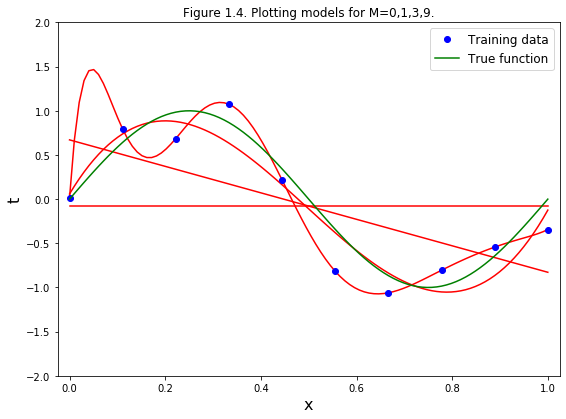

In [9]:
W_list = [] ## List to save the coefficients for polynomials of M=0,...,9.
rms_train  = [] ## List to save the rms error for each of the fits in W_list.

plt.figure(figsize = (9, 6.5))

for M in range(10):
    ## Compute the best fit and append to the list.
    W = best_fit(x_train, t_train, M)
    W_list.append(W)

    ## Compute the RMS error for the given polynomial and the training dataset.
    rms = rms_error(x_train, W, t_train)
    
    ## y_estimate is used to plot the fitted polynomial.
    y_estimate = y(x_test, W)
    
    ## Append the RMS error value to the RMS list.
    rms_train.append(rms)
    
    ## Plot the polynomials for cases M = 0,1,3,9.
    if(M in [0, 1, 3, 9]):
        plt.plot(x_test, y_estimate, 'r-')
        
plt.plot(x_train, t_train, 'bo', label='Training data') 
plt.plot(x_test, t_true, 'g-', label='True function')
plt.xlim(-0.025, 1.025)
plt.ylim(-2, 2)
plt.title("Figure 1.4. Plotting models for M=0,1,3,9.")
plt.xlabel(r"x", fontsize=16)
plt.ylabel(r"t", fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.show()

### Analysis
We can see by eye that the polynomial with $M=9$ passes through the training data points exactly. However, this polynomial doesn't seem to capture the regularity of the sine function, instead the function takes a strange shape. The behaviour we obtain with the polynomial of degree $M=9$ is called **over-fitting**.

Above we have saved the RMS error for the training data points for each of the models $M=0,\ldots,9$ in the variable `rms_train`. We can use now the **test data** which was generated using the same procedure as the training data, and computing the RMS error we can check how accurately our models predict the data.

We can first plot the test dataset.

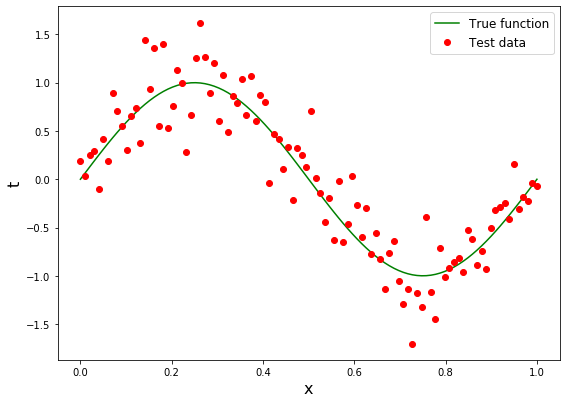

In [10]:
plt.figure(figsize=(9,6.5))
plt.plot(x_test, t_true, 'g', label='True function')
plt.plot(x_test, t_test, 'ro', label='Test data')
plt.xlabel(r"x", fontsize=16)
plt.ylabel(r"t", fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.show()

We now check the values for the RMS error for the different fitted models using both the training and the test dataset.

In [11]:
## Compute the RMS error using the test data.
rms_test = []    

for W in W_list:
    rms =  rms_error(x_test, W, t_test)
    rms_test.append(rms)

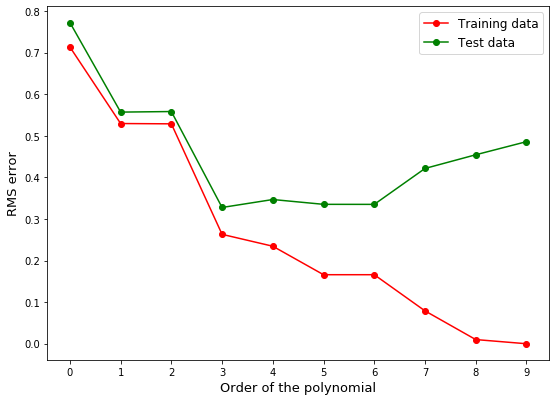

In [12]:
plt.figure(figsize=(9,6.5))
M_array = list(range(10))
plt.plot(M_array, rms_train, '-o', color='red', label='Training data')
plt.plot(np.arange(0, 10), rms_test, '-o', color='green', label='Test data')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Order of the polynomial', fontsize=13)
plt.ylabel('RMS error', fontsize=13)
plt.xticks(np.arange(0, 10), np.arange(0, 10))
plt.show()

As we have could anticipated by eye-inspecting the fits and using the new information, we realize the models with $M \geq 7$ gives a poor fit to the data as compared with the models in the range $3 \leq M \leq 6$.

We can gain further insight by looking at the values of the $\mathbf{w}^\star$.

In [13]:
from IPython.display import HTML, display
import tabulate

headers = ['w0','w1','w2','w3','w4','w5','w6','w7','w8','w9']
display(HTML(tabulate.tabulate(W_list, tablefmt='html', headers=headers)))

w0,w1,w2,w3,w4,w5,w6,w7,w8,w9
-0.078571,,,,,,,,,
0.67087,-1.49888,,,,,,,,
0.716608,-1.80761,0.308728,,,,,,,
0.0588211,9.02237,-28.2345,19.0288,,,,,,
-0.0680833,13.7813,-52.267,57.5761,-19.2736,,,,,
0.0444378,3.53062,33.1787,-183.951,257.571,-110.738,,,,
0.0442743,3.57425,32.6403,-181.633,253.093,-106.755,-1.32768,,,
0.0199482,29.881,-401.442,2392.52,-7025.49,10507.5,-7704.19,2200.82,,
0.0153124,63.0576,-1070.5,7438.92,-26062.7,50141.2,-53943.5,30510.6,-7077.45,
0.0151685,78.085,-1417.6,10565.4,-40750.7,90156.6,-119466,94063.5,-40701.5,7472.01


So what is happening is that the coefficients of the high-degree polynomials become fine-tuned to the data which, of course, also includes the random noise.

Another interesting thing to see is that the *over-fitting* can be reduced it the number of data points to fit the model increases. So in here we fit the polynomial $M=9$ but using $N=15$ and $N=100$ data points.

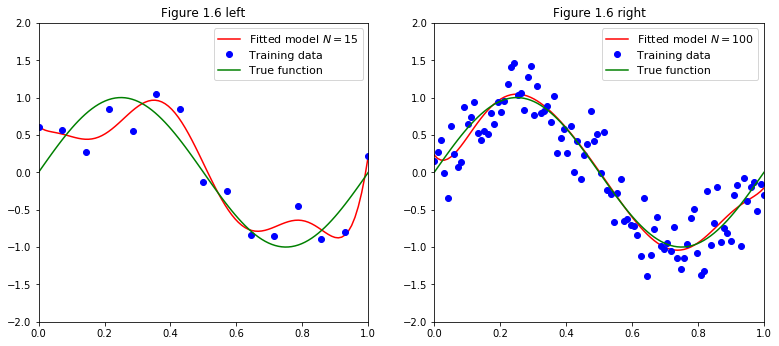

In [14]:
M2 = 9

N2 = 15
x_train2 = np.linspace(0., 1., N2)
t_train2 =  np.sin(2*np.pi*x_train2) + np.random.normal(mu,sigma,N2)

N3 = 100
x_train3 = np.linspace(0., 1., N3)
t_train3 = np.sin(2*np.pi*x_train3) + np.random.normal(mu,sigma,N3)


W2 = best_fit(x_train2, t_train2, M2)
W3 = best_fit(x_train3, t_train3, M2)
    
y_estimate2 = y(x_train3, W2)
y_estimate3 = y(x_train3, W3)

plt.figure(figsize=(13, 5.5))
plt.subplot(1, 2, 1)
plt.plot(x_train3, y_estimate2, 'r-', label=r'Fitted model $N=15$')
plt.plot(x_train2, t_train2, 'bo', label='Training data') 
plt.plot(x_test, t_true, 'g-', label='True function')
plt.xlim(0.0, 1.0)
plt.ylim(-2, 2)
plt.title("Figure 1.6 left")
plt.legend(loc='best', fontsize=11)

plt.subplot(1, 2, 2)
plt.plot(x_train3, y_estimate3, 'r-', label=r'Fitted model $N=100$')
plt.plot(x_train3, t_train3, 'bo', label='Training data') 
plt.plot(x_test, t_true, 'g-', label='True function')
plt.xlim(0.0, 1.0)
plt.ylim(-2, 2)
plt.title("Figure 1.6 right")
plt.legend(loc='best', fontsize=11)

plt.show()

### Exercise
Implement fitting using the error function in (1.4).

###References

Christopher Bishop. (2007). Pattern Recognition and Machine Learning (Information Science and Statistics). Springer